# Darcy-Brinkman convection

initial-boundary value problem on $(\textbf{x}, t)\in\Omega\times[0,\infty)$

$$\frac{\partial c}{\partial t} + \textbf{u}\cdot\nabla c=\frac{1}{\sqrt{RaPr}}\nabla^2c$$

$$\nabla\cdot\textbf{u}=0$$

$$\frac{\partial\textbf{u}}{\partial t}+\textbf{u}\cdot\nabla\textbf{u}=-\nabla p + \sqrt{\frac{Pr}{Ra}}\nabla^2\textbf{u}+\rho(c)\,\textbf{e}_g - \frac{\chi(\textbf{x})}{Da}\sqrt{\frac{Pr}{Ra}}\textbf{u}$$

constitutive relation

$$\rho(c) = -c $$

initial conditions

$$c(\textbf{x},t=0)=c_0(\textbf{x})$$

$$\textbf{u}(\textbf{x},t=0)=\textbf{u}_0(\textbf{x})$$

$$p(\textbf{x},t=0)=p_0(\textbf{x})$$

Dirichlet boundary condition on $\textbf{x}\in\partial\Omega_{\text{D}}$

$$c = c_{\text{D}}$$

Neumann boundary condition on $\textbf{x}\in\partial\Omega_{\text{N}}=\partial\Omega/\partial\Omega_{\text{D}}$

$$\textbf{n}\cdot\nabla c = c_{\text{N}}$$

essential boundary condition on $\textbf{x}\in\partial\Omega_E$

$$\textbf{u}=\textbf{u}_{\text{E}}$$

natural boundary condition on $\textbf{x}\in\partial\Omega_{\text{N}}=\partial\Omega/\partial\Omega_{\text{E}}$

$$\sigma\cdot\textbf{n} = \boldsymbol{\sigma}_{\text{N}}$$

mapping to Navier-Stokes equations defined in `demo/py/navier_stokes.py`

$$
\begin{Bmatrix}
\rho \\
\mu \\
\textbf{f}
\end{Bmatrix}
\mapsto
\begin{Bmatrix}
1 \\ 
\sqrt{\frac{Pr}{Ra}} \\
\rho\,\textbf{e}_g - \frac{\chi(\textbf{x})}{Da}\sqrt{\frac{Pr}{Ra}}\textbf{u}
\end{Bmatrix}
$$


## Example: $d=2$ rectangle

horizontal rectangle

$$\Omega = [0, L_x] \times [0, L_y]$$

$$\textbf{e}_g=-\textbf{e}_y$$

pure fluid and porous medium in upper and lower subdomains

$$\chi(y)=\text{H}(\tfrac{1}{2}L_y - y)$$

diffusive base state initial conditions

$$c_0(x, y)=1 - y +\mathcal{N}(x,y)$$

$$\textbf{u}_0=\textbf{0}$$

prescribed temperature on upper and lower boundaries

$$c(x,y=0)=1$$

$$c(x,y=L_y)=0$$

no-flux on left and right boundaries

$$(\textbf{n}\cdot\nabla c)\vert_{x=0,y}=(\textbf{n}\cdot\nabla c)\vert_{x=L_x,y}=0$$

no-slip and no-penetration on entire boundary

$$\textbf{u}\vert_{\partial\Omega}=\textbf{0}$$

In [1]:
from lucifex.sim import integrate
from lucifex.viz import plot_colormap, plot_line
from lucifex.io import write
from lucifex.utils import maximum

from py.darcy_brinkman import darcy_brinkman_rectangle


Pr = 1.0
Ra = 1e7
Da = 1e-5
simulation = darcy_brinkman_rectangle(
    Lx=2.0,
    Ly=1.0,    
    Nx=64,
    Ny=64,
    cell='quadrilateral',
    Pr=Pr,
    Ra=Ra,
    Da=Da,
    noise_eps=1e-2,
    dt_max=0.01, 
    cfl_courant=0.25,
)

n_stop = 1000
dt_init = 1e-6
n_init = 10
integrate(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

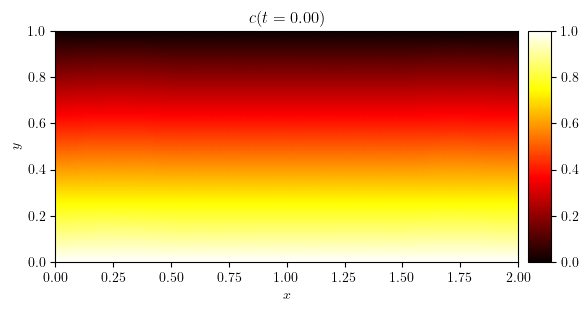

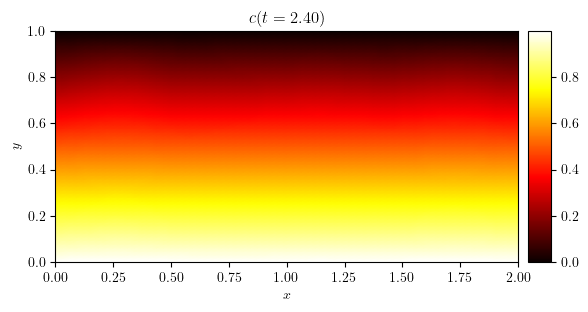

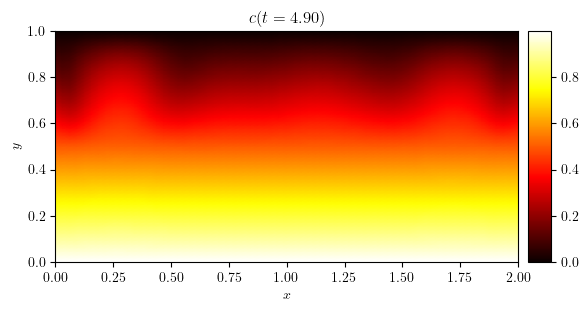

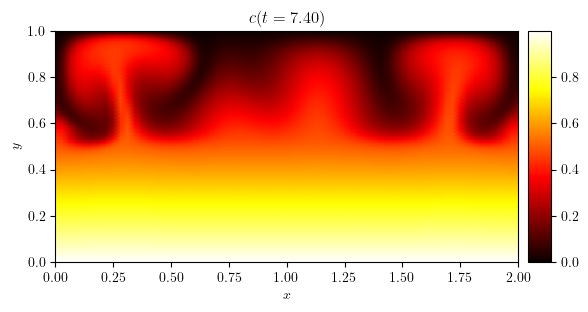

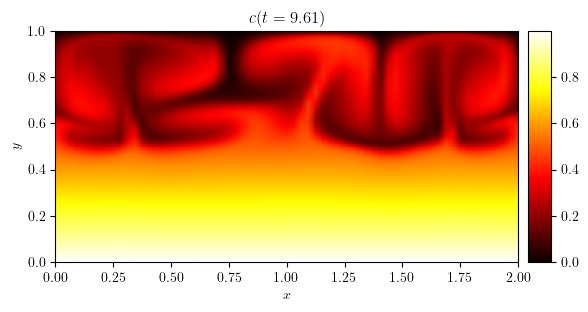

In [10]:
c = simulation['c']
mesh = c.mesh

time_fractions = (0, 0.25, 0.5, 0.75, 0.99)
time_indices = [int(frac * len(c.series)) for frac in time_fractions]
for i in time_indices:
    t = c.time_series[i]
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={t:.2f})$')
    write(fig, f'A21_darcy_brinkman_c(t={t:.2f})', './figures', file_ext=['pdf', 'png'], close=False, pickle=False)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$t$', ylabel='$\\max_{\\textbf{x}}|\\textbf{u}|$'>)

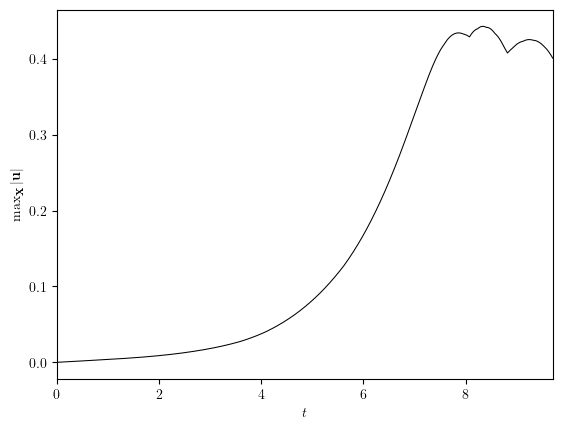

In [3]:
u = simulation['u']
uMax = [maximum(i) for i in u.series]

plot_line((u.time_series, uMax), x_label='$t$', y_label='$\max_{\\textbf{x}}|\\textbf{u}|$')